### Contents
1. 마우스로 사각형 그리기
2. 마우스로 지정한 영역 csv로 저장하기
3. 영역지정해서 필터 적용하기
4. 영역지정해서 모자이크 처리
5. 같은 위치의 다른 이미지로 채우가ㅣ
6. 이미지 복원하기
7. 마우스로 다각형 그리기
8. 마우스로 다각형으로 이미지 추출 후 저장하기

# 마우스 이벤트 다루기

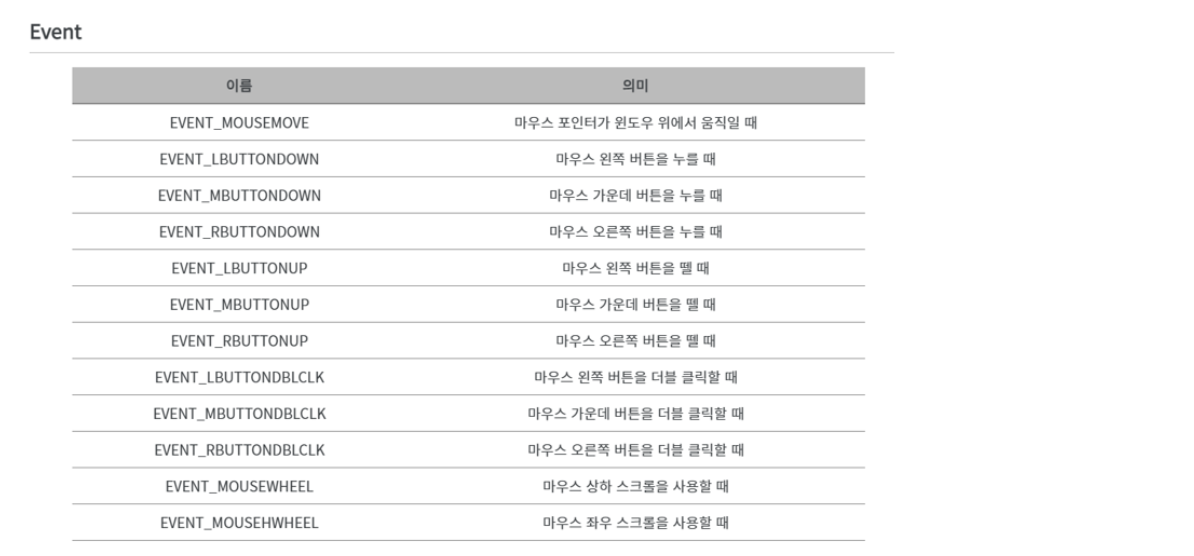

https://076923.github.io/posts/Python-opencv-39/

In [3]:
# 기본 사용법
import cv2

def event_mous(event,x,y,flags,param):
    print(x,y)

img=cv2.imread('./img02.jpg') # 샘플이미지 불러오기
cv2.namedWindow('img')#먼저 마우스 이벤트를 적용할 창을 만듦
cv2.setMouseCallback('img',event_mous)#만든 창에 마우스콜백설정함수(setMouseCallback)로 envent_mous 함수를 설정함
#창이름, 콜백함수
#콜백함수: 마우스 이벤트가 발생했을 때, 전달할 함수
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

251 517
252 515
252 513
252 512
253 510
253 508
253 505
254 503
254 501
254 499
255 497
255 495
256 493
256 491
257 489
258 487
259 484
259 482
260 480
261 478
262 476
262 473
263 471
264 469
264 467
265 465
266 462
267 460
267 458
268 456
269 454
270 451
271 449
273 447
273 444
275 441
276 438
277 436
278 434
279 432
281 428
283 426
283 423
285 421
286 418
288 414
290 412
291 409
293 406
294 402
295 400
297 397
298 395
300 392
302 388
303 385
305 382
306 378
308 375
310 372
312 368
314 365
317 362
318 358
320 355
323 351
324 348
327 345
328 341
331 338
334 334
335 331
337 328
340 324
342 321
345 317
346 314
349 311
352 307
354 304
357 300
359 297
361 293
364 290
366 287
369 284
371 281
374 277
376 274
378 272
380 268
383 265
385 262
388 260
390 257
393 253
395 251
397 249
399 246
401 244
404 242
406 239
408 237
411 235
412 233
414 230
417 228
419 226
420 224
422 223
424 220
426 219
428 218
429 216
432 214
434 212
435 211
437 209
439 208
440 207
443 205
444 204
446 203
447 202
449 202


566 332
568 332
569 331
570 331
572 330
573 330
574 329
576 329
577 328
579 328
581 327
582 326
584 326
586 325
587 324
589 324
590 323
593 322
594 321
596 320
598 319
600 317
601 316
604 315
605 313
607 312
609 310
611 309
612 308
615 306
617 304
618 302
620 300
622 298
624 296
626 293
628 292
630 290
632 287
634 285
636 283
637 280
640 277
641 275
643 272
645 269
648 266
649 263
651 259
653 257
654 254
657 250
658 247
660 244
662 241
663 237
665 234
667 231
669 226
671 223
673 219
674 216
676 212
678 208
679 205
680 202
682 197
684 194
685 191
686 188
688 184
690 180
690 177
692 173
694 169
695 166
696 163
698 159
700 156
701 153
703 149
704 147
705 144
707 141
708 137
709 135
711 133
712 130
714 127
715 125
716 123
718 120
719 118
721 115
721 113
723 111
724 109
726 106
727 104
728 103
729 101
731 98
732 97
733 96
735 93
736 91
738 90
738 88
740 86
741 84
742 82
743 80
745 79
745 77
746 76
748 75
748 73
750 72
750 70
752 69
752 68
754 65
755 64
755 63
756 61
757 60
758 58
759 57
759

### 1. 실습1: 마우스로 사각형 그리기

In [1]:
####################################################
# 1. 사각형 그리기
####################################################
# Import packages

import cv2


def drawRectangle(action, x, y, flags, parms):


    # Referencing global variables
    global top_left_corner, bottom_right_corner
    # Mark the top left corner when left mouse button is pressed
    if action == cv2.EVENT_LBUTTONDOWN:
        top_left_corner = (x, y)
    # When left mouse button is released, mark bottom right corner
    elif action == cv2.EVENT_LBUTTONUP:
        bottom_right_corner = (x, y)
        # Draw the rectangle
        cv2.rectangle(image, top_left_corner, bottom_right_corner, (0, 255, 0),5)
        cv2.imshow("Window", image)

# Read Images
image = cv2.imread("./img01.jpg")
# Make a temporary image, will be useful to clear the drawing

temp = image.copy()
# Create a named window
cv2.namedWindow("Window")

# highgui function called when mouse events occur
cv2.setMouseCallback("Window", drawRectangle)

k = 0
# Close the window when key q is pressed
while k != ord('q'):
# Display the image
    cv2.imshow("Window", image)
    k = cv2.waitKey(0)
    # If c is pressed, clear the window, using the dummy image
    if (k == ord('c')):
        image = temp.copy()
        cv2.imshow("Window", image)

cv2.destroyAllWindows()

### 2. 실습2:  마우스로 지정한 영역 csv로 저장하기

In [2]:
####################################################
# 1. 사각형 그리기
####################################################
# Import packages

import cv2
import pandas as pd



# Lists to store the bounding box coordinates

top_left_corner = []

bottom_right_corner = []

xy=[]
# function which will be called on mouse input


def drawRectangle(action, x, y, flags, parms):


    # Referencing global variables
    global top_left_corner, bottom_right_corner
    # Mark the top left corner when left mouse button is pressed
    if action == cv2.EVENT_LBUTTONDOWN:
        top_left_corner = (x, y)
    # When left mouse button is released, mark bottom right corner
    elif action == cv2.EVENT_LBUTTONUP:
        bottom_right_corner = (x, y)
        
        # 좌표 추가
        xy.append([top_left_corner, bottom_right_corner])
        # Draw the rectangle
        cv2.rectangle(image, top_left_corner, bottom_right_corner, (0, 255, 0),5)
        cv2.imshow("Window", image)

# Read Images
image = cv2.imread("./img01.jpg")
# Make a temporary image, will be useful to clear the drawing

temp = image.copy()
# Create a named window
cv2.namedWindow("Window")
# highgui function called when mouse events occur
cv2.setMouseCallback("Window", drawRectangle)

k = 0
# Close the window when key q is pressed
while k != ord('q'):
# Display the image
    cv2.imshow("Window", image)
    k = cv2.waitKey(0)
    # If c is pressed, clear the window, using the dummy image
    if (k == ord('c')):
        image = temp.copy()
        cv2.imshow("Window", image)

cv2.destroyAllWindows()

df=pd.DataFrame(xy,columns=['top','bottom'])
print(df)
df.to_csv('얼굴.csv')

          top      bottom
0  (278, 153)  (464, 302)
1  (583, 382)  (723, 490)
2   (426, 16)  (562, 104)
3  (588, 148)  (705, 269)
4   (93, 110)  (196, 201)


### 3. 실습: 영역지정해서 필터 적용하기
> 이미지 비트 연산 <br>
https://ehpub.co.kr/tag/bitwise_not/


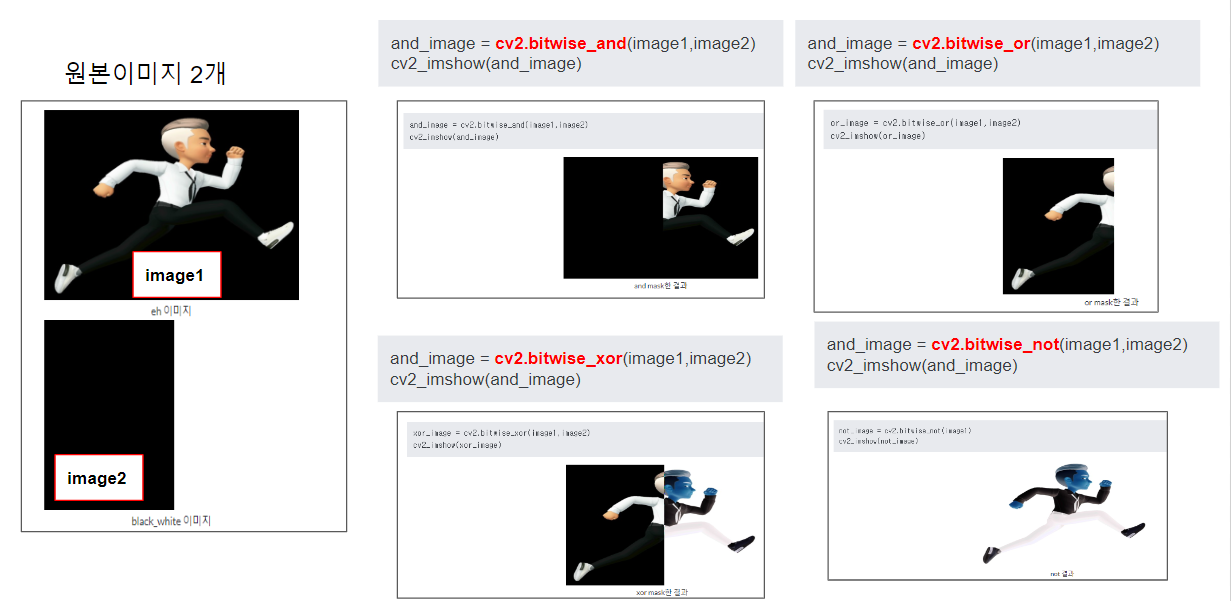

In [2]:
import cv2
import pandas as pd


top=[]
bottom=[]

xy=[]
def drawRectangle(action, x, y, flags, *userdata):


    # Referencing global variables
    global top_left_corner, bottom_right_corner,top,bottom,image
    # Mark the top left corner when left mouse button is pressed
    if action == cv2.EVENT_LBUTTONDOWN:
        top_left_corner = [(x, y)]
        top=(x,y)
        #top.append([x,y])

    # When left mouse button is released, mark bottom right corner
    elif action == cv2.EVENT_LBUTTONUP:
        bottom_right_corner = [(x, y)]
        bottom=(x,y)
        #bottom.append([x,y])
        xy.append([top,bottom])
        #xy.append(bottom)
        # Draw the rectangle
        cv2.rectangle(image, top_left_corner[0], bottom_right_corner[0], (0, 255, 0), 2, 8)
        #image[top[1]:bottom[1],top[0]:bottom[0]]=[255,255,255]
        image[top[1]:bottom[1],top[0]:bottom[0]]=cv2.bitwise_not(image[top[1]:bottom[1],top[0]:bottom[0]])
        cv2.imshow("Window", image)
        # 지정한 영역 필터 효과 넣기
        



# Read Images
image = cv2.imread("./img01.jpg")

temp = image.copy()
# Create a named window
cv2.namedWindow("Window")
# highgui function called when mouse events occur
cv2.setMouseCallback("Window", drawRectangle)

k = 0
# Close the window when key q is pressed
while k != ord('q'):
# Display the image
    cv2.imshow("Window", image)
    k = cv2.waitKey(0)
    # If c is pressed, clear the window, using the dummy image
    if (k == ord('c')):
        image = temp.copy()
        cv2.imshow("Window", image)
        print(top)



cv2.destroyAllWindows()


df=pd.DataFrame(xy,columns=['top','bottom'])
print(df)
df.to_csv('얼굴.csv')




          top      bottom
0  (489, 206)  (559, 365)
1  (366, 249)  (485, 393)


### 4.영역지정해서 모자이크 처리

In [4]:

import cv2
import pandas as pd




top=[]
bottom=[]
# function which will be called on mouse input

xy=[]
def drawRectangle(action, x, y, flags, *userdata):


    # Referencing global variables
    global top_left_corner, bottom_right_corner,top,bottom,image
    # Mark the top left corner when left mouse button is pressed
    if action == cv2.EVENT_LBUTTONDOWN:
        top_left_corner = [(x, y)]
        top=(x,y)
        #top.append([x,y])

    # When left mouse button is released, mark bottom right corner
    elif action == cv2.EVENT_LBUTTONUP:
        bottom_right_corner = [(x, y)]
        bottom=(x,y)
        #bottom.append([x,y])
        xy.append([top,bottom])
        #xy.append(bottom)
        # Draw the rectangle
        cv2.rectangle(image, top_left_corner[0], bottom_right_corner[0], (0, 255, 0), 2, 8)
        #image[top[1]:bottom[1],top[0]:bottom[0]]=[255,255,255]
        #모자이크 처리
        tmp=cv2.resize(image[top[1]:bottom[1],top[0]:bottom[0]], (10, 10))
        w=abs(bottom[0]-top[0])
        h=abs(bottom[1]-top[1])
        image[top[1]:bottom[1],top[0]:bottom[0]]=cv2.resize(tmp,(w,h))
        cv2.imshow("Window", image)
        # 지정한 영역 필터 효과 넣기
        



# Read Images
image = cv2.imread("./img01.jpg")
# Make a temporary image, will be useful to clear the drawing

temp = image.copy()
# Create a named window
cv2.namedWindow("Window")
# highgui function called when mouse events occur
cv2.setMouseCallback("Window", drawRectangle)

k = 0
# Close the window when key q is pressed
while k != 113:
# Display the image
    cv2.imshow("Window", image)
    k = cv2.waitKey(0)
    # If c is pressed, clear the window, using the dummy image
    if (k == 99):
        image = temp.copy()
        cv2.imshow("Window", image)
        print(top)



cv2.destroyAllWindows()


df=pd.DataFrame(xy,columns=['top','bottom'])
print(df)
df.to_csv('얼굴.csv')


          top      bottom
0  (275, 130)  (465, 302)
1  (513, 340)  (716, 492)


### 5. 같은 위치의 다른 이미지로 채우기

In [ ]:
# [다른 이미지와 합성하기] 

# Import packages
# 레이블 만들기
# 판다스로 테이블 만들어 csv로 저장하기

import cv2
import pandas as pd



# Lists to store the bounding box coordinates


top=[]
bottom=[]
# function which will be called on mouse input

xy=[]
def drawRectangle(action, x, y, flags, *userdata):


    # Referencing global variables
    global top_left_corner, bottom_right_corner,top,bottom,image
    # Mark the top left corner when left mouse button is pressed
    if action == cv2.EVENT_LBUTTONDOWN:
        top_left_corner = [(x, y)]
        top=(x,y)
        #top.append([x,y])

    # When left mouse button is released, mark bottom right corner
    elif action == cv2.EVENT_LBUTTONUP:
        bottom_right_corner = [(x, y)]
        bottom=(x,y)
        #bottom.append([x,y])
        xy.append([top,bottom])
        #xy.append(bottom)
        # Draw the rectangle
        cv2.rectangle(image, top_left_corner[0], bottom_right_corner[0], (0, 0, 0))
        #image[top[1]:bottom[1],top[0]:bottom[0]]=[255,255,255]
        
        #두번이미지 합성

        image[top[1]:bottom[1],top[0]:bottom[0]]=image2[top[1]:bottom[1],top[0]:bottom[0]]
        cv2.imshow("Window", image)
        # 지정한 영역 필터 효과 넣기
        



# Read Images
image = cv2.imread("./img01.jpg")

#두번 이미지 불러와서 기존이미지 wxh 사이즈 조절하기
h=image.shape[0]
w=image.shape[1]
image2 = cv2.resize(cv2.imread("./img02.jpg"),(w,h))



# Make a temporary image, will be useful to clear the drawing

temp = image.copy()
# Create a named window
cv2.namedWindow("Window")

# highgui function called when mouse events occur
cv2.setMouseCallback("Window", drawRectangle)

k = 0
# Close the window when key q is pressed
# image 창
while k != 113:
# Display the image
    cv2.imshow("Window", image)
    k = cv2.waitKey(0)
    # If c is pressed, clear the window, using the dummy image
    if (k == 99):
        image = temp.copy()
        cv2.imshow("Window", image)
        print(top)
        
        


cv2.destroyAllWindows()


df=pd.DataFrame(xy,columns=['top','bottom'])
print(df)
df.to_csv('얼굴.csv')

#이미지 저장
cv2.imwrite('./image_m.jpg',image)


### 6. 이미지 복원하기

In [31]:
# [이미지 복원하기]

# Import packages
# 레이블 만들기
# 판다스로 테이블 만들어 csv로 저장하기

import cv2
import pandas as pd

#name=input('레이블은?')



# Lists to store the bounding box coordinates

top_left_corner = []

bottom_right_corner = []

top=[]
bottom=[]
# function which will be called on mouse input

xy=[]
def drawRectangle(action, x, y, flags, *userdata):


    # Referencing global variables
    global top_left_corner, bottom_right_corner,top,bottom,image
    # Mark the top left corner when left mouse button is pressed
    if action == cv2.EVENT_LBUTTONDOWN:
        top_left_corner = [(x, y)]
        top=(x,y)
        #top.append([x,y])

    # When left mouse button is released, mark bottom right corner
    elif action == cv2.EVENT_LBUTTONUP:
        bottom_right_corner = [(x, y)]
        bottom=(x,y)
        #bottom.append([x,y])
        xy.append([top,bottom])
        #xy.append(bottom)
        # Draw the rectangle
        #cv2.rectangle(image, top_left_corner[0], bottom_right_corner[0], (0, 0, 0))
        #image[top[1]:bottom[1],top[0]:bottom[0]]=[255,255,255]
        
        #두번이미지 합성

        image[top[1]:bottom[1],top[0]:bottom[0]]=image2[top[1]:bottom[1],top[0]:bottom[0]]
        cv2.imshow("Window", image)
        # 지정한 영역 필터 효과 넣기
        



# Read Images
image = cv2.imread("./image_m.jpg")

#두번 이미지 불러와서 기존이미지 wxh 사이즈 조절하기
h=image.shape[0]
w=image.shape[1]
image2 = cv2.resize(cv2.imread("./img01.jpg"),(w,h))



temp = image.copy()
# Create a named window
cv2.namedWindow("Window")

# highgui function called when mouse events occur
cv2.setMouseCallback("Window", drawRectangle)

k = 0
# Close the window when key q is pressed
# image 창
while k != 113:
# Display the image
    cv2.imshow("Window", image)
    k = cv2.waitKey(0)
    # If c is pressed, clear the window, using the dummy image
    if (k == 99):
        image = temp.copy()
        cv2.imshow("Window", image)
        print(top)
        
        


cv2.destroyAllWindows()


df=pd.DataFrame(xy,columns=['top','bottom'])
print(df)
df.to_csv('얼굴.csv')

#이미지 저장
#cv2.imwrite('./image_m.jpg',image)


          top      bottom
0  (147, 102)  (339, 304)
1  (358, 112)  (519, 314)
2  (275, 119)  (509, 424)
3   (449, 81)  (636, 367)
4  (142, 247)  (380, 459)


# 7. 마우스로 다각형 그리기

In [4]:
#---------------------------------------------
# 마우스로 다각형 그리기
#-----------------------------------------------

import cv2
import numpy as np

point_list=[] #마우스 클릭했을 때 좌표 수집

def event_mous(event,x,y,flags,param):
    global point_list
    if event==cv2.EVENT_LBUTTONDOWN:#마우스 클릭
        point_list.append([x,y])
    if event==cv2.EVENT_LBUTTONDBLCLK:#마우스 더블클릭하면 다각형선이 그려짐
        point_list=np.array(point_list)#다각형의 좌표는 넘파이 배열이여야 함
        cv2.polylines(img,[point_list],True,(0,0,255),3) # 다각형 그리기
        cv2.imshow('img',img)
        

img=cv2.imread('./img02.jpg') # 샘플이미지 불러오기
cv2.namedWindow('img')#먼저 마우스 이벤트를 적용할 창을 만듦
cv2.setMouseCallback('img',event_mous,img)#만든 창에 마우스콜백설정함수(setMouseCallback)로 envent_mous 함수를 설정함
#창이름, 콜백함수
#콜백함수: 마우스 이벤트가 발생했을 때, 전달할 함수
cv2.imshow('img',img) 
cv2.waitKey(0)
cv2.destroyAllWindows()

# 8. 마우스로 다각형으로 이미지 추출후 저장하기

In [5]:
import cv2
import numpy as np

point_list=[] #마우스 클릭했을 때 좌표 수집

def event_mous(event,x,y,flags,param):
    global point_list
    if event==cv2.EVENT_LBUTTONDOWN:#마우스 클릭
        point_list.append([x,y])
    if event==cv2.EVENT_LBUTTONDBLCLK:#마우스 더블클릭하면 다각형선이 그려짐
        mask=np.zeros(img.shape, np.uint8)#검정색 마스크영역을 img크기만큼
        point_list=np.array(point_list)#다각형의 좌표는 넘파이 배열이여야 함
        mask=cv2.polylines(mask,[point_list],True,(255,255,255),3)# 마스크영역 다각형 그리기
        mask2=cv2.fillPoly(mask,[point_list],(255,255,255))# 마스크 영역에 다각형 채우기
        ROI=cv2.bitwise_and(img,mask2)# 원본 이미지와, mask2와 공통된 영역 추출
        cv2.imwrite('ROI.png',ROI) # 다각형 추출한 ROI 저장
        cv2.imshow('roi',ROI) #Roi 화면보기
        

img=cv2.imread('./img02.jpg') # 샘플이미지 불러오기
cv2.namedWindow('img')#먼저 마우스 이벤트를 적용할 창을 만듦
cv2.setMouseCallback('img',event_mous,img)#만든 창에 마우스콜백설정함수(setMouseCallback)로 envent_mous 함수를 설정함
#창이름, 콜백함수
#콜백함수: 마우스 이벤트가 발생했을 때, 전달할 함수
cv2.imshow('img',img) 
cv2.waitKey(0)
cv2.destroyAllWindows()